In [82]:
import networkx as nx 
from networkx import Graph, DiGraph
import pandas as pd
import time
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Question 1
## part a

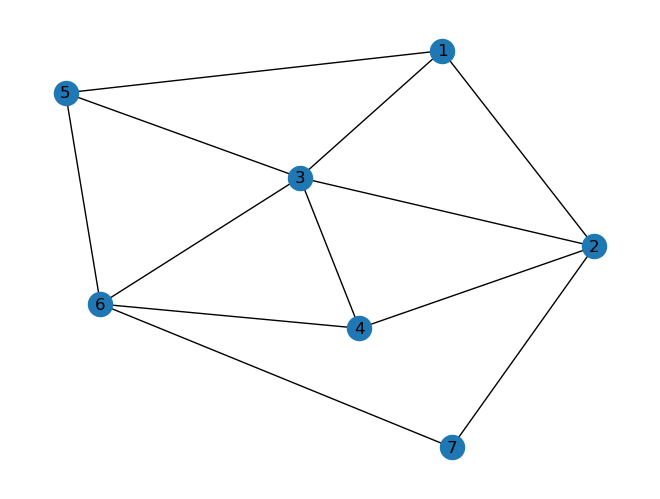

In [83]:
graph = Graph()
graph.add_edges_from([
    (1,2),
    (1,3),
    (1,5),
    (2,3),
    (2,4),
    (2,7),
    (3,5),
    (3,4),
    (3,6),
    (4,6),
    (5,6),
    (6,7),
    ])
pos = nx.spring_layout(graph)
nx.draw(graph, pos=pos)
nx.draw_networkx_labels(graph, pos=pos)
plt.plot()
plt.show()


$C = \frac{3 \times \text{number of triangles}}{\text{number of connected triplets}}$
## Triangles
$(v_1,v_2,v_3)$
$(v_1,v_3,v_5)$
$(v_3,v_5,v_6)$
$(v_3,v_2,v_4)$
$(v_3,v_4,v_6)$

## Triplets
$(v_6,v_5,v_1)$
$(v_6,v_5,v_3)$
$(v_3,v_5,v_1)$
$(v_5,v_1,v_3)$
$(v_5,v_1,v_2)$
$(v_3,v_1,v_2)$
$(v_1,v_2,v_3)$
$(v_1,v_2,v_4)$
$(v_1,v_2,v_7)$
$(v_3,v_2,v_4)$
$(v_3,v_2,v_7)$
$(v_4,v_2,v_7)$
$(v_2,v_7,v_6)$
$(v_7,v_6,v_5)$
$(v_7,v_6,v_4)$
$(v_7,v_6,v_3)$
$(v_4,v_6,v_3)$
$(v_4,v_6,v_5)$
$(v_3,v_6,v_5)$
$(v_2,v_4,v_6)$
$(v_2,v_4,v_3)$
$(v_3,v_4,v_6)$
$(v_6,v_3,v_5)$
$(v_5,v_3,v_1)$
$(v_2,v_3,v_1)$
$(v_2,v_3,v_4)$
$(v_4,v_3,v_6)$
$(v_2,v_4,v_6)$
$(v_4,v_6,v_5)$
$(v_6,v_5,v_1)$
$(v_5,v_1,v_2)$
$(v_1,v_2,v_4)$


$\text{number of triangles} =  5$\
$\text{number of connected triplets} =  32$

$C = \frac{3 \times 5}{32}$
$C = \frac{15}{32} \approx 0.46875$

In [84]:
print(f"Global clustering coefficient: {nx.transitivity(graph)}")

Global clustering coefficient: 0.46875


## part b


$c_u = \frac{2 \times T(u)}{deg(u)(deg(u) - 1)}$
## Local Clustering Coefficient
$c_u(v_1) = \frac{2 \times 2}{3(3 - 1)}$\
$c_u(v_1) = \frac{4}{6} \approx .66 $

$c_u(v_2) = \frac{2 \times 2}{4(4 - 1)}$\
$c_u(v_2) = \frac{4}{12} \approx .33 $

$c_u(v_3) = \frac{2 \times 5}{5(5 - 1)}$\
$c_u(v_3) = \frac{10}{20} = .5 $

$c_u(v_4) = \frac{2 \times 2}{3(3 - 1)}$\
$c_u(v_4) = \frac{4}{6} \approx .66 $

$c_u(v_5) = \frac{2 \times 2}{3(3 - 1)}$\
$c_u(v_5) = \frac{4}{6} \approx .66 $

$c_u(v_6) = \frac{2 \times 2}{4(4 - 1)}$\
$c_u(v_6) = \frac{4}{12} \approx .33 $

$c_u(v_7) = \frac{2 \times 0}{2(2 - 1)}$\
$c_u(v_7) = \frac{0}{2} = 0 $

In [85]:
for node in sorted(graph.nodes):
    print(f"local clustering coefficient of node {node}: {nx.clustering(graph, node)}")

local clustering coefficient of node 1: 0.6666666666666666
local clustering coefficient of node 2: 0.3333333333333333
local clustering coefficient of node 3: 0.5
local clustering coefficient of node 4: 0.6666666666666666
local clustering coefficient of node 5: 0.6666666666666666
local clustering coefficient of node 6: 0.3333333333333333
local clustering coefficient of node 7: 0


# Question 2

In [86]:
def get_cosine_similarity(graph:Graph, pair:tuple):
    node1, node2 = pair
    node1_neighbors = set(nx.neighbors(graph, node1))
    node2_neighbors = set(nx.neighbors(graph, node2))
    intersection = set.intersection(node1_neighbors, node2_neighbors)
    inter_size = len(intersection)

    sqrt_deg_1 = np.sqrt(nx.degree(graph, node1))
    sqrt_deg_2 = np.sqrt(nx.degree(graph, node2))

    return inter_size / (sqrt_deg_1 * sqrt_deg_2)

def get_jaccard_similarity(graph:Graph, pair:tuple):
    node1, node2 = pair
    node1_neighbors = set(nx.neighbors(graph, node1))
    node2_neighbors = set(nx.neighbors(graph, node2))
    intersection = set.intersection(node1_neighbors, node2_neighbors)
    union = set.union(node1_neighbors, node2_neighbors)
    return len(intersection) / len(union)

In [87]:
asia_df = pd.read_csv('../data/lastfm_asia_edges.csv')
asia_df.head()

,node_1,node_2
0,0,747
1,1,4257
2,1,2194
3,1,580
4,1,6478


In [88]:
asia_graph = Graph()
asia_graph.add_edges_from(asia_df.values)
print(asia_graph)

Graph with 7624 nodes and 27806 edges


In [89]:
stats_df = pd.DataFrame({}, columns=['node1', 'node2', 'jaccard', 'cosine'])
stats_df.head()

,node1,node2,jaccard,cosine


In [90]:
nodes = asia_graph.nodes
for node1 in tqdm(nodes):
    for node2 in nodes:
        if node1 != node2:
            cosine = get_cosine_similarity(asia_graph, (node1, node2))
            jaccard = get_jaccard_similarity(asia_graph, (node1, node2))
            if (cosine + jaccard) > 0:
                row = pd.DataFrame({"node1":[node1], "node2":[node2], "jaccard":[jaccard], "cosine":[cosine]})
                stats_df = pd.concat([stats_df, row], ignore_index=True)

  0%|          | 0/7624 [00:00<?, ?it/s]/tmp/ipykernel_136536/3295639539.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = pd.concat([stats_df, row], ignore_index=True)
100%|██████████| 7624/7624 [2:12:49<00:00,  1.05s/it]  


In [91]:
stats_df

,node1,node2,jaccard,cosine
0,0,3855,0.013699,0.117041
1,0,5610,0.021739,0.147442
2,0,5892,0.040000,0.200000
3,0,6363,0.125000,0.353553
4,0,4704,0.045455,0.213201
...,...,...,...,...
766809,7505,7475,0.200000,0.447214
766810,7505,3323,0.333333,0.577350
766811,7505,4025,0.500000,0.707107
766812,7505,6348,0.250000,0.500000


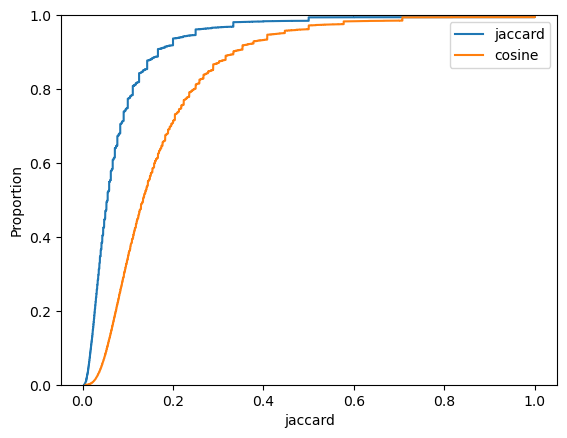

In [92]:
sns.ecdfplot(stats_df['jaccard'], label='jaccard')
sns.ecdfplot(stats_df['cosine'], label='cosine')
plt.legend()
plt.show()

# Question 3

In [93]:
n_graph = Graph()
n_graph.add_edges_from([
    (1,2),
    (1,3),
    (2,4),
    (3,4),
    (2,5),
    (4,5),
])
print(n_graph)

Graph with 5 nodes and 6 edges


In [94]:
adj = nx.adjacency_matrix(graph)
adj = adj.toarray()

eig = np.linalg.eigvals(adj)
max_eig = np.max(eig)

alpha = 1 / max_eig
I = np.identity(len(adj))

reg_equiv = np.linalg.inv(I - alpha*adj)

np.set_printoptions(precision=3)
print(f"The value for alpha: {alpha:.4f}")
print(f"The regular equivelance matrix: \n {reg_equiv}")

The value for alpha: 0.2763
The regular equivelance matrix: 
 [[1.143e+15 1.310e+15 1.685e+15 1.143e+15 1.190e+15 7.240e+14 1.310e+15]
 [1.310e+15 1.501e+15 1.930e+15 1.310e+15 1.363e+15 8.296e+14 1.501e+15]
 [1.685e+15 1.930e+15 2.482e+15 1.685e+15 1.752e+15 1.067e+15 1.930e+15]
 [1.143e+15 1.310e+15 1.685e+15 1.143e+15 1.190e+15 7.240e+14 1.310e+15]
 [1.190e+15 1.363e+15 1.752e+15 1.190e+15 1.237e+15 7.532e+14 1.363e+15]
 [7.240e+14 8.296e+14 1.067e+15 7.240e+14 7.532e+14 4.585e+14 8.296e+14]
 [1.310e+15 1.501e+15 1.930e+15 1.310e+15 1.363e+15 8.296e+14 1.501e+15]]


# Question 4

From the following paper [here](https://cs.stanford.edu/people/jure/pubs/triads-chi10.pdf).
They analysed three datasets, the first of which is described as follows

"Epinions product review Web site,
where users can indicate their trust or distrust of the reviews
of others"

In terms of social balance theory, if one user distrusts a review, and another user distrusts a review, then those two users should trust each others reviews. The social balance theory seems less applicable in this context as it isn't necessarily the case that the previously described situation holds or even should hold.

# Question 5

In [95]:
import random
def get_similarity_significance(graph:Graph, pair:tuple):
    node1, node2 = pair
    adj = nx.adjacency_matrix(graph)
    adj = adj.toarray()
    n1 = adj[node1]
    n2 = adj[node2]
    return pearsonr(n1, n2)[0]

nodes = list(asia_graph.nodes)
node1 = nodes[0]
node2 = nodes[1]
sim_sig = get_similarity_significance(asia_graph, (node1, node2))
print(f"Similarity significance between {node1} and {node2}: {sim_sig}")

Similarity significance between 0 and 747: -0.00039375251521758147
